# 버즈 리뷰를 긍부정 분류 에 따른 각각 시각화 진행하기

In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Okt
from matplotlib import font_manager, rc

In [11]:
airpods = pd.read_excel('(1)samsung_all_buds.xlsx')
airpods

,ratings,reviews,label
0,5,"가성비 갑, 성능 좋아요!! 추천드립니다! **내돈내산 후기입니다**구매 및 개봉일...",1
1,5,전직 컴수리기사의 버즈fe 테스트 결과보고서 주 문 : 24. 3. 27도 착 :...,1
2,5,가성비 그자체의 무선 이어폰입니다 내돈내산 솔직후기!!!---------------...,1
3,5,러닝용으로 구매했는데 절대 안빠지고 잘 버텨주는 제품 작년 겨울에 쿠팡에서 산 저렴...,1
4,5,"""화이트 갤럭시 버즈 FE, 내돈내산! 최고! (づ｡◕‿‿◕｡)づ삼성전자 갤럭시 버...",1
...,...,...,...
6795,4,등록된 헤드라인이 없습니다 사운드 품질은 생각보다 좀 떨어지는듯 싶고 갤럭시 웨어러...,1
6796,4,"만족 다행히 페어링 불량, 오류난거 없었구요 사용 잘 하구 있습니다 박스안에 덩그러...",1
6797,5,자주 구매할 것 같아요. 불량사항 없습니다. 아버지가 너무 좋아하시더라구요.쿠팡으로...,1
6798,4,선으로부터의 자유...앞으로 기대됩니다~^^ 색상은 예상했던대로 산뜻하니 세련되보이...,1


In [12]:
posipods = airpods[airpods['label'] == 1]
negepods = airpods[airpods['label'] == 0]

In [13]:
PosiSum = posipods['reviews'].str.cat()
NegeSum = negepods['reviews'].str.cat()

clean_PosiReview = re.sub(r'[^가-힣 ]', '', PosiSum)
clean_NegeReview = re.sub(r'[^가-힣 ]', '', NegeSum)

In [14]:
nlp = Okt()
review_positive = nlp.nouns(clean_PosiReview)
review_negetive = nlp.nouns(clean_NegeReview)

removeWords = ['등록', '헤드라인', '리뷰', '용이', '제품', '버즈']

review_positive = [word for word in review_positive if word not in removeWords]
review_negetive = [word for word in review_negetive if word not in removeWords]

In [15]:
countP = Counter(review_positive)
countN = Counter(review_negetive)

In [16]:
word_countP = dict()
for tag, counts in countP.most_common(60):
    if(len(str(tag)) > 1):
        word_countP[tag] = counts

word_countN = dict()
for tag, counts in countN.most_common(60):
    if(len(str(tag)) > 1):
        word_countN[tag] = counts

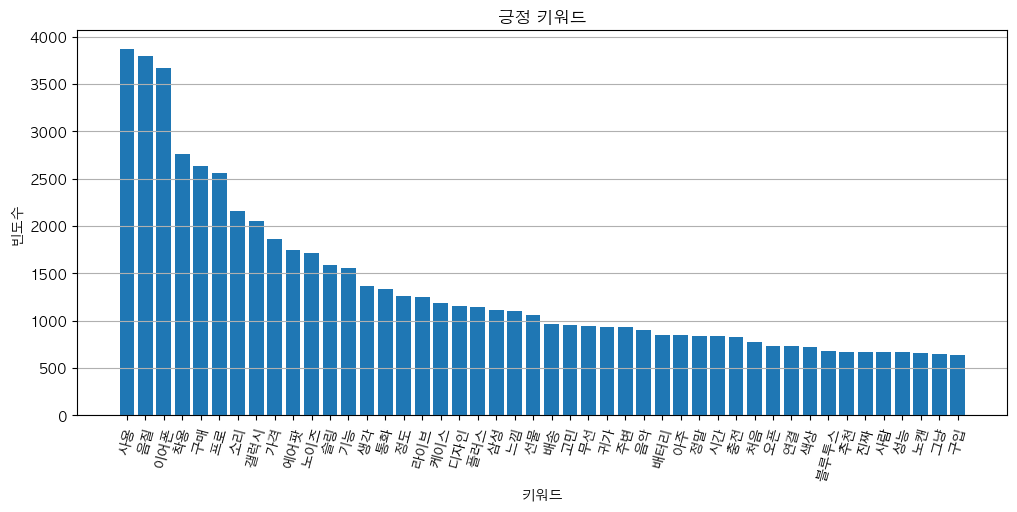

In [23]:
font_path = rc('font', family='AppleGothic')

plt.figure(figsize = (12,5))
plt.xlabel('키워드')
plt.ylabel('빈도수')
plt.title('긍정 키워드')
plt.grid(True, axis='y')
sorted_Keys = sorted(word_countP, key = word_countP.get, reverse = True)
sorted_Values = sorted(word_countP.values(), reverse = True)
plt.bar(range(len(word_countP)), sorted_Values, align = 'center')    # 센터는 디폴트라 생략가능
plt.xticks(range(len(word_countP)), list(sorted_Keys), rotation = 75)
plt.show()

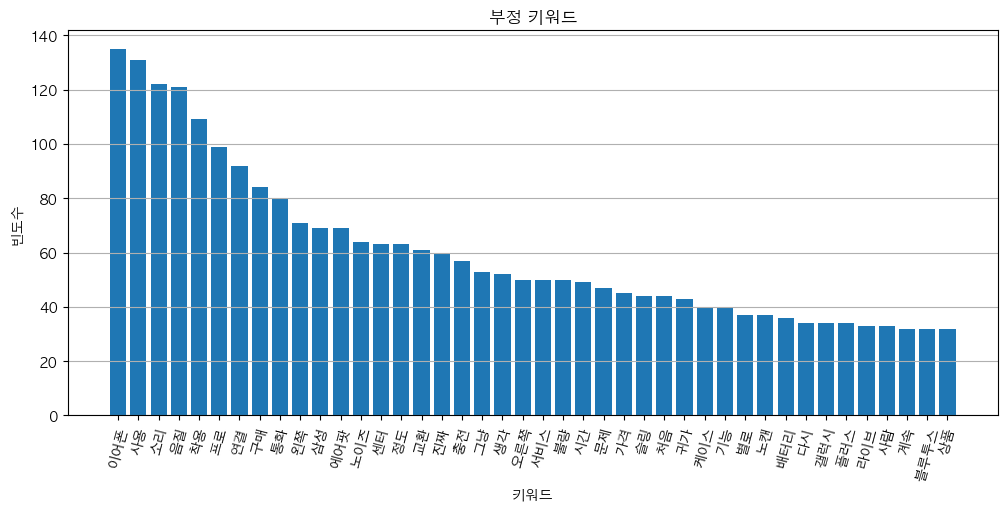

In [24]:
plt.figure(figsize = (12,5))
plt.xlabel('키워드')
plt.ylabel('빈도수')
plt.title('부정 키워드')
plt.grid(True, axis='y')
sorted_Keys = sorted(word_countN, key = word_countN.get, reverse = True)
sorted_Values = sorted(word_countN.values(), reverse = True)
plt.bar(range(len(word_countN)), sorted_Values, align = 'center')    # 센터는 디폴트라 생략가능
plt.xticks(range(len(word_countN)), list(sorted_Keys), rotation = 75)
plt.show()